# Adesso adaptado no Colab

## Vídeos antigos
* [Adesso2-mmd-1-9 (76min)](https://www.loom.com/share/a8373d5d902a4317820c8c7ef31d5524)


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import cv2, requests, sys
import numpy as np

In [ ]:
# download _morph.py from drive
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1FlMtAkb0npwmD54aCysLsxB84PehcKMe

In [ ]:
from _morph import *

# mmdbeef

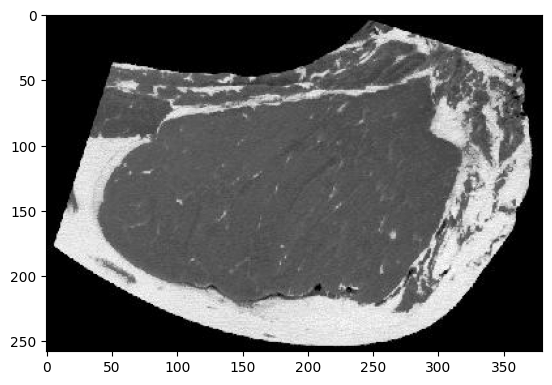

In [ ]:
img = mm.read('https://drive.google.com/file/d/1pqFPvnNuhqncBdKLjyJA1JXAgBLhLm5J/view?usp=sharing')
f = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY) # converte para grayscale
mm.show(f) 

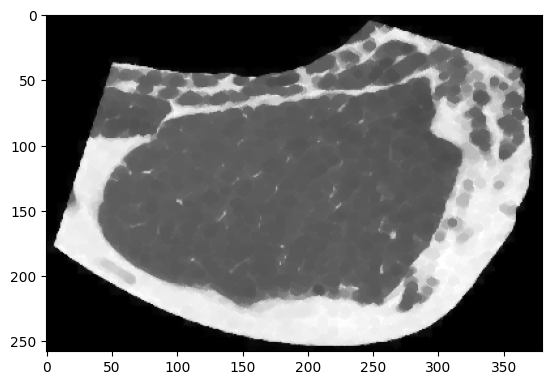

In [ ]:
kernel = mm.sedisk(7)
#closing = cv2.morphologyEx(f, cv2.MORPH_CLOSE, kernel)
closing = mm.close(f,kernel)
mm.show(closing) 

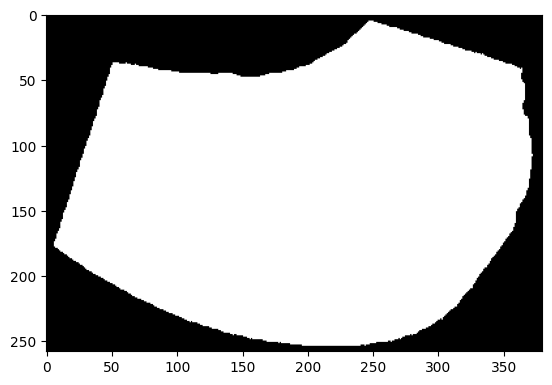

In [ ]:
mark1 = mm.threshold(closing,50)
mm.show(mark1) 

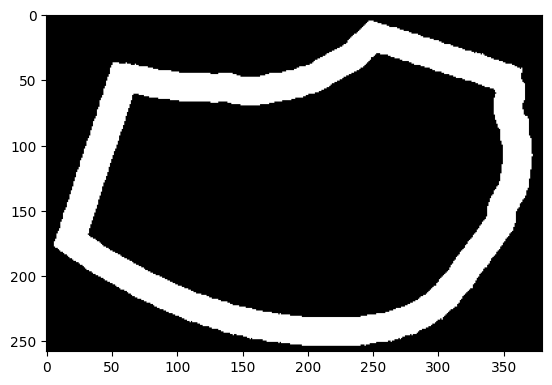

In [ ]:
kernel2 = mm.sedisk(45)
mark2 = mm.ero(mark1, kernel2)
mm.show(mark1-mark2) 

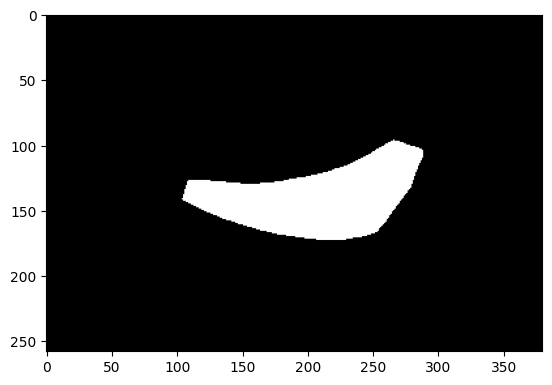

In [ ]:
kernel3 = mm.sedisk(120)
mark3 = mm.ero(mark2, kernel3)
mm.show(mark3) 

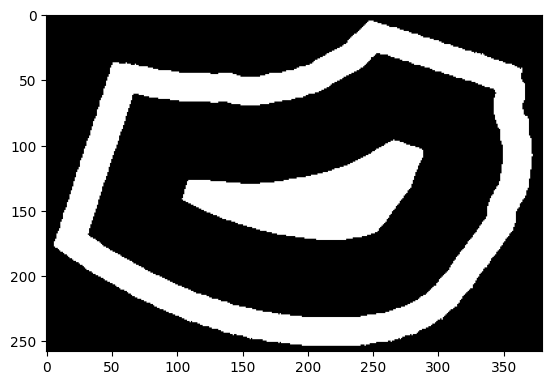

In [ ]:
mark4 = mark1-mark2 + mark3
mm.show(mark4) 

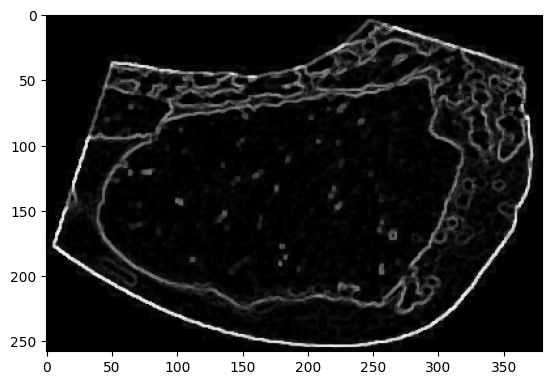

In [ ]:
#gradm = closing - mm.ero(closing, kernel)
gradm = mm.gradm(closing)
mm.show(gradm) 

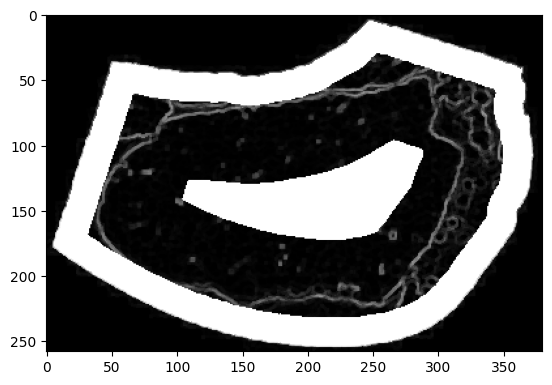

In [ ]:
mm.show(np.maximum(gradm,mark4))

0 3


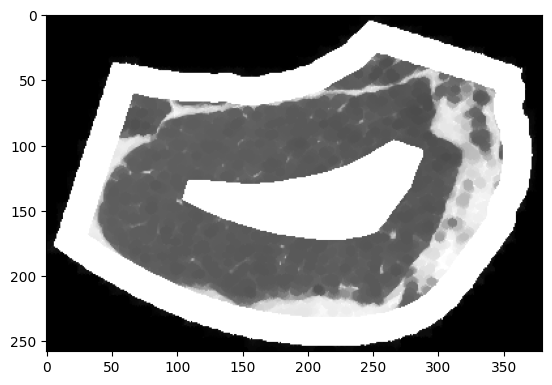

In [ ]:
# Marker labelling
markers = mm.label(mark4)
markersAux = markers

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[markers==0] = 0
markers[markers==1] = 0

print(np.amin(markers),np.amax(markers))

mm.show(np.maximum(closing,(markers>0)*255)) 

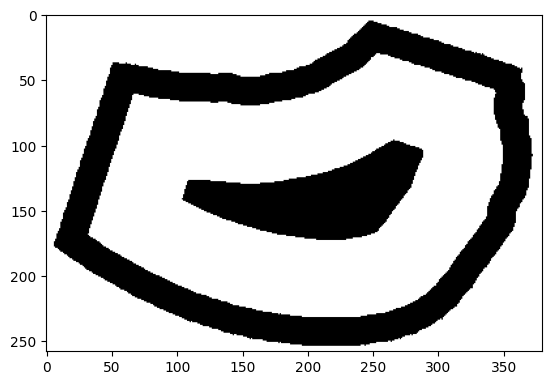

In [ ]:
mm.show((markersAux==0)*255)

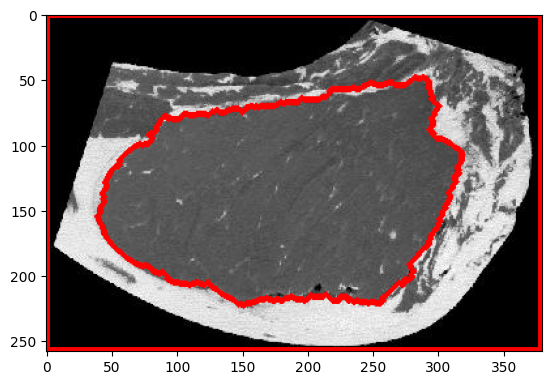

In [ ]:
gradm3 = cv2.cvtColor(gradm ,cv2.COLOR_GRAY2RGB) # converte para grayscale
water = cv2.watershed(gradm3,markers)
g = mm.dil(np.array(water==-1,dtype='uint8'),mm.secross(1))
mm.show(img,g)